In [1]:
import pickle
import re
import pandas as pd
import numpy as np

import networkx as nx
from matplotlib import pyplot as plt
from pygsp import graphs
%matplotlib inline

In [2]:
filename="./fifa data/fifa2020data.csv"
fifa_df=pd.read_csv(filename)

In [3]:
#check data schema
fifa_df.columns[:20]

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential',
       'value_eur', 'wage_eur', 'player_positions', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate'],
      dtype='object')

In [4]:
team_attributes_df=fifa_df.groupby('club').mean()[['overall','value_eur','wage_eur','age','potential','international_reputation']].sort_values(by='value_eur',ascending=False)

team_attributes_df=team_attributes_df.reset_index()

team_attributes_df

FIFA_club_name=team_attributes_df['club'].unique()

In [5]:
network_club_name=['RB Leipzig', 'Borussia Dortmund', 'Schalke ', 'Augsburg',
       'Bayer  Leverkusen', 'TSG  Hoffenheim', 'Werder Bremen',
       'Hertha B', 'Borussia Mönchengladbach', 'Eintracht Frankfurt',
       'Wolfsburg', 'VfB Stuttgart', 'Hannover ', 'Darmstadt ',
       'Ingolstadt ', 'Hamburger', '.F Mainz ', '.  Köln',
       'Arminia Bielefeld', 'Alemannia Aachen', 'Bochum', '. Nuremberg',
       'Energie Cottbus', 'Bayern Munich', 'Fortuna Düsseldorf',
       'Freiburg', 'M Duisburg', 'St. Pauli', 'SpVgg Greuther Fürth',
       'T  Munich', 'Hansa Rostock', '. Kaiserslautern',
       'Eintracht Braunschweig', 'Paderborn ', 'Karlsruher',
       '. Union Berlin', 'SpVgg Unterhaching', 'SBV Excelsior Rotterdam',
       'NEC Nijmegen', 'Heracles Almelo', 'Willem II Tilburg', 'Utrecht',
       'Cambuur-Leeuwarden', 'ADO Den Haag', 'De Graafschap Doetinchem',
       'Roda JC Kerkrade', 'Twente Enschede', 'AZ Alkmaar',
       'Ajax Amsterdam', 'Groningen', 'Vitesse Arnhem', 'R Roosendaal',
       'RKC Waalwijk', 'NAC Breda', 'Feyenoord Rotterdam', 'Den Bosch',
       'P Eindhoven', 'Heerenveen', 'PEC Zwolle', 'Dordrecht',
       'Go Ahead Eagles Deventer', 'Sparta Rotterdam', 'VVV-Venlo',
       'Volendam', 'Fortuna Sittard', 'Zwolle', 'Emmen',
       'Atlético Madrid', 'Granada', 'Celta de Vigo', 'Levante',
       'Espanyol Barcelona', 'Girona', 'Getafe', 'Athletic Bilbao',
       'Real Sociedad', 'Real Madrid', 'Real Betis', 'Real Valladolid',
       'Sevilla', 'Mallorca', 'CA Osasuna', 'Rayo Vallecano', 'Barcelona',
       'Real Zaragoza', 'Real Murcia', 'Eibar', 'Málaga',
       'Sporting Gijón', 'Huesca', 'Villarreal', 'Valencia',
       'Deportivo Alavés', 'Gimnàstic de Tarragona', 'Recreativo Huelva',
       'Las Palmas', 'Deportivo de La Coruña', 'Tenerife',
       'Racing Santander', 'Leganés', 'Numancia', 'Almería', 'Xerez',
       'Real Oviedo', 'Hércules', 'Córdoba', 'Elche', 'Cádiz', 'Albacete',
       'Le Mans Union Club ', 'Valenciennes', 'RC Lens', 'Montpellier',
       'Lyon', 'Lille', 'Paris Saint-Germain', 'Saint-Étienne',
       'Sochaux-Montbéliard', 'Lorient', 'Stade Brest ',
       'Athlétic Club Arlésien', 'Nancy-Lorraine', 'Boulogne', 'SM Caen',
       'Nice', 'Girondins Bordeaux', 'Monaco', 'Grenoble Foot ',
       'Stade Rennais', 'AJ Auxerre', 'Toulouse', 'Marseille',
       'Stade Reims', 'O Angers', 'Bastia', 'Metz',
       'RC Strasbourg Alsace', 'O Dijon', 'Nantes', 'EA Guingamp',
       'Amiens', 'G Ajaccio', 'Évian Thonon Gaillard', 'ES Troyes AC',
       'AC Ajaccio', 'Nîmes', 'Sedan-Ardennes', 'AC Le Havre',
       'Istres Ouest Provence', 'Manchester United', 'Manchester City',
       'Newcastle United', 'Liverpool', 'Hull City', 'Everton',
       'Crystal Palace', 'Leicester City', 'Queens Park Rangers',
       'Tottenham Hotspur', 'Swansea City', 'West Ham United',
       'West Bromwich Albion', 'Southampton', 'Sunderland A',
       'Stoke City', 'Chelsea', 'Fulham', 'Birmingham City',
       'Charlton Athletic', 'Leeds United', 'Aston Villa',
       'Middlesbrough', 'Blackburn Rovers', 'Ipswich Town', 'Arsenal',
       'Bolton Wanderers', 'Burnley', 'Wigan Athletic', 'Derby County',
       'Watford', 'A Bournemouth', 'Norwich City', 'Sheffield United',
       'Brighton & Hove Albion', 'Portsmouth', 'Reading', 'Coventry City',
       'Bradford City', 'Cardiff City', 'Wolverhampton Wanderers',
       'Huddersfield Town', 'Blackpool', 'Sporting CP', 'Braga',
       'Vitória Setúbal', 'Porto', 'Feirense', 'Tondela', 'Moreirense',
       'Boavista Porto', 'Benfica', 'Nacional', 'Gil Vicente',
       'Santa Clara', 'Belenenses SAD', 'Rio Ave', 'Vitória Guimarães',
       'Marítimo', 'União de Leiria', 'Paços de Ferreira',
       'Varzim Sport Club', 'Académica Coimbra', 'Beira-Mar',
       'Portimonense', 'Penafiel', 'Arouca', 'Estrela Amadora',
       'Naval º de Maio', 'Desportivo Aves', 'GD Chaves', 'GD Estoril',
       'Olhanense', 'Leixões', 'Trofense', 'Alverca', 'União Madeira',
       'Famalicão', 'Salgueiros', 'Farense', 'Campomaiorense', 'Juventus',
       'Torino', 'Livorno', 'Florentia Viola', 'Empoli', 'Lecce',
       'Bologna', 'Sampdoria', 'Udinese', 'Milan AC', 'Internazionale',
       'Cagliari', 'AC Perugia', 'Brescia', 'SPAL', 'Hellas Verona',
       'Chievo Verona', 'Roma', 'Lazio', 'AC Venezia ', 'Atalanta',
       'AC Siena', 'Bari', 'Napoli', 'Benevento', 'Vicenza', 'Reggina',
       'Crotone', 'A Fiorentina', 'AC Parma', 'AC Fiorentina', 'Sassuolo',
       'Modena  ', 'SPAL ', 'Inter Milan', 'Genoa C', 'AC Milan',
       'Catania', 'Parma  ', 'Piacenza', 'Frosinone', 'Como', 'Palermo',
       'Parma', 'AC Cesena', 'Ascoli  ', 'Messina Peloro',
       'Delfino Pescara ', 'Ancona', 'Novara  ', 'A Treviso', 'Carpi']

In [6]:
missing_club=[club for club in network_club_name if not(club in  FIFA_club_name)]

In [7]:
len(missing_club)

183

In [8]:
missing_club

['Schalke ',
 'Augsburg',
 'Bayer  Leverkusen',
 'TSG  Hoffenheim',
 'Werder Bremen',
 'Hertha B',
 'Wolfsburg',
 'Hannover ',
 'Darmstadt ',
 'Ingolstadt ',
 'Hamburger',
 '.F Mainz ',
 '.  Köln',
 'Arminia Bielefeld',
 'Alemannia Aachen',
 'Bochum',
 '. Nuremberg',
 'Energie Cottbus',
 'Bayern Munich',
 'Freiburg',
 'M Duisburg',
 'St. Pauli',
 'T  Munich',
 'Hansa Rostock',
 '. Kaiserslautern',
 'Paderborn ',
 'Karlsruher',
 '. Union Berlin',
 'SBV Excelsior Rotterdam',
 'NEC Nijmegen',
 'Willem II Tilburg',
 'Utrecht',
 'Cambuur-Leeuwarden',
 'De Graafschap Doetinchem',
 'Roda JC Kerkrade',
 'Twente Enschede',
 'Ajax Amsterdam',
 'Groningen',
 'Vitesse Arnhem',
 'R Roosendaal',
 'NAC Breda',
 'Feyenoord Rotterdam',
 'Den Bosch',
 'P Eindhoven',
 'Heerenveen',
 'Dordrecht',
 'Go Ahead Eagles Deventer',
 'Volendam',
 'Zwolle',
 'Emmen',
 'Granada',
 'Celta de Vigo',
 'Levante',
 'Espanyol Barcelona',
 'Girona',
 'Getafe',
 'Athletic Bilbao',
 'Real Valladolid',
 'Sevilla',
 'Mallorca

In [9]:
from fuzzywuzzy import process
choices=FIFA_club_name
process.extractOne('Bayer  Leverkusen', choices)

/Users/Saibo/anaconda3/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


('Bayer 04 Leverkusen', 95)

In [10]:
pkl_file = open('./temporary_pkl/transfer_span_reduced.pkl','rb')
transfer_span_reduced = pickle.load(pkl_file)
pkl_file.close()

In [11]:
def rename(club,choices):
    return process.extractOne(club, choices)[0]

In [12]:
#len(new_name)=282  ,  29.5 seconds
new_name=[rename(club,choices) if not (club in FIFA_club_name) else club for club in list(transfer_span_reduced['club_name'].unique())  ]

In [13]:
len(set(new_name)),len(new_name)

(197, 224)

In [14]:
fifa_df_reduced=fifa_df[fifa_df['club'].isin(new_name)]

In [16]:
attributes_df=fifa_df_reduced.groupby('club')['overall'].apply(list).reset_index(name='score_list')

attributes_df = attributes_df.merge(team_attributes_df[['overall','value_eur','club']],how='left',left_on='club',right_on='club')

#attributes_df.drop([163, 199], inplace=True)

# Change to millions of euros
attributes_df.value_eur = attributes_df.value_eur.apply(lambda x: x/1000000)
attributes_df.columns = ['club', 'scores', 'average_scores', 'value_millions']
attributes_df.scores = attributes_df.scores.apply(lambda x: np.array(list(map(float, x))))

n_players = min(attributes_df.scores.apply(len))
n_clubs = attributes_df.index.size

In [17]:
# Choose just the 21 (n_players) best player scores for each team

def filter_top(x):
    x.sort()
    x = x[::-1].copy()
    return x[:n_players]

attributes_df.scores = attributes_df.scores.apply(filter_top)

In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(attributes_df.scores.values, attributes_df.value_millions.values, test_size=0.35, random_state=27)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.52, random_state=27)

class ClubsDataset(Dataset):
    def __init__(self, mode='training', transform=None):
        self.data = attributes_df.sample(frac=1).reset_index(drop=True)
        if mode == 'training':
            self.X = X_train
            self.y = y_train
        elif mode == 'validation':
            self.X = X_valid
            self.y = y_valid
        elif mode == 'test':
            self.X = X_test
            self.y = y_test
        else:
            raise Exception('Invalid mode!')
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, index):
        return torch.tensor(self.X[index]), self.y[index]

In [30]:
# Funções auxiliares para lidar com os parametros

def get_trainable(model_params):
    return (p for p in model_params if p.requires_grad)

def get_frozen(model_params):
    return (p for p in model_params if not p.requires_grad)

def all_trainable(model_params):
    return all(p.requires_grad for p in model_params)

def all_frozen(model_params):
    return all(not p.requires_grad for p in model_params)

def freeze_all(model_params):
    for param in model_params:
        param.requires_grad = False

In [31]:
batch_size = n_clubs

train_dataset = ClubsDataset(mode='training')
valid_dataset = ClubsDataset(mode='validation')
test_dataset = ClubsDataset(mode='test')

train_dataloader = DataLoader(train_dataset, batch_size, shuffle=True, num_workers=0)
valid_dataloader = DataLoader(valid_dataset, batch_size, shuffle=False, num_workers=0)
test_dataloader = DataLoader(test_dataset, batch_size=n_clubs, shuffle=False, num_workers=0)

In [32]:
n_hidden1 = 10000
n_hidden2 = 1000

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(n_players, n_hidden1),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(n_hidden1, n_hidden2),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(n_hidden2, 1)
        )

    def forward(self, x):
        # x = x.view(x.size(0), -1)
        x = self.layers(x)
        return x

In [33]:
# del model, X, y, y_, loss

lr = 0.0002

model = MLP()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(get_trainable(model.parameters()), lr=lr)

max_valid_acc = 0.
n = 0

n_max = 100

while n < n_max:
    # Train
    model.train();
    
    running_loss = 0.
    #correct = 0
    
    for i, (X, y) in enumerate(train_dataloader):
        y_ = model(X.float())
        optimizer.zero_grad()
        loss = criterion(y_, y)
        loss.backward()
        optimizer.step()
        
        # Statistics
        _, y_label_ = torch.max(y_, 1)
        running_loss += loss.item()*batch_size

    train_loss = running_loss / len(train_dataloader.dataset)
    
    print(f'--------- Epoch: {n} ---------')
    print(f'Train Loss: {round(train_loss,3)}')

    
    # Eval
    model.eval();
    
    running_loss = 0.
    #correct = 0
    
    with torch.no_grad():
        for i, (X, y) in enumerate(valid_dataloader):
            y_ = model(X.float());
        
            # Statistics
            _, y_label_ = torch.max(y_, 1)
            loss = criterion(y_, y)
            running_loss += loss.item() * X.shape[0]
            
        valid_loss = running_loss / len(valid_dataloader.dataset)
        
        print(f'Valid Loss: {round(valid_loss,3)}')
         
    n += 1

/Users/Saibo/anaconda3/lib/python3.7/site-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


--------- Epoch: 0 ---------
Train Loss: 246.875
Valid Loss: 78971.812
--------- Epoch: 1 ---------
Train Loss: 123505.413
Valid Loss: 5830.391


/Users/Saibo/anaconda3/lib/python3.7/site-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([33])) that is different to the input size (torch.Size([33, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


--------- Epoch: 2 ---------
Train Loss: 10527.653
Valid Loss: 2135.931
--------- Epoch: 3 ---------
Train Loss: 2849.216
Valid Loss: 4700.762
--------- Epoch: 4 ---------
Train Loss: 7139.774
Valid Loss: 4249.306
--------- Epoch: 5 ---------
Train Loss: 6671.848
Valid Loss: 3141.437
--------- Epoch: 6 ---------
Train Loss: 4949.951
Valid Loss: 2008.436
--------- Epoch: 7 ---------
Train Loss: 3276.891
Valid Loss: 1276.344
--------- Epoch: 8 ---------
Train Loss: 2025.663
Valid Loss: 764.45
--------- Epoch: 9 ---------
Train Loss: 1185.575
Valid Loss: 408.628
--------- Epoch: 10 ---------
Train Loss: 676.564
Valid Loss: 169.811
--------- Epoch: 11 ---------
Train Loss: 349.619
Valid Loss: 52.797
--------- Epoch: 12 ---------
Train Loss: 152.825
Valid Loss: 46.111
--------- Epoch: 13 ---------
Train Loss: 151.215
Valid Loss: 98.05
--------- Epoch: 14 ---------
Train Loss: 300.184
Valid Loss: 155.065
--------- Epoch: 15 ---------
Train Loss: 348.567
Valid Loss: 186.805
--------- Epoch: 1

In [34]:
# Final accuracy test
model.eval();

running_loss = 0.
correct = 0

with torch.no_grad():
    for i, (X, y) in enumerate(test_dataloader):
        print(i)
        y_ = model(X.float());
        # Statistics

        loss = criterion(y_, y)
#         plt.hist(loss)
#         running_loss += loss.item() * X.shape[0]

#     test_loss = running_loss / len(test_dataloader.dataset)
#     test_acc = 100 * correct/len(test_dataloader.dataset)

#     print(f'Test Loss: {round(test_loss,3)}')
#     print(f'Test Acc:  {round(test_acc,1)} %')

0


/Users/Saibo/anaconda3/lib/python3.7/site-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([36])) that is different to the input size (torch.Size([36, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


(array([1., 0., 5., 7., 8., 3., 5., 2., 1., 4.]),
 array([3.7637846, 3.9396114, 4.1154385, 4.291265 , 4.467092 , 4.6429186,
        4.8187456, 4.994572 , 5.170399 , 5.3462257, 5.522053 ],
       dtype=float32),
 <a list of 10 Patch objects>)

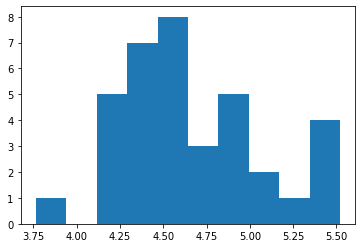

In [38]:
plt.hist(y_.flatten().numpy())

(array([ 2.,  1.,  1.,  0.,  2.,  1.,  1.,  3.,  5., 20.]),
 array([-21.8613443 , -19.30957383, -16.75780336, -14.20603289,
        -11.65426242,  -9.10249194,  -6.55072147,  -3.998951  ,
         -1.44718053,   1.10458994,   3.65636041]),
 <a list of 10 Patch objects>)

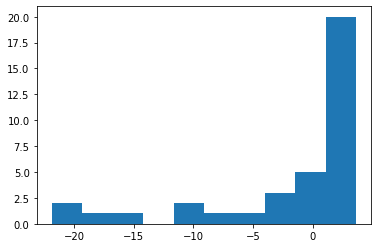

In [35]:
plt.hist(y_.flatten().numpy()- y_test)

In [36]:
print(loss)

tensor(57.2430)
